## ASTR 21100, Winter 2020

## Homework Assignment 2 (70 points + 10 extra-credit points)


In [2]:
#import necessary modules and functions
import numpy as np
import scipy
from scipy.integrate import romberg

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

from codes.plot_utils import plot_pretty
from codes.plot_utils import plot_line_points
plot_pretty(fontsize=12)


# read in function that will be used for this exercise
k, Pk = np.loadtxt('data/test_matterpower_logintk1000.dat', usecols=(0, 1),  unpack=True)

# their log10 values that will be used 
lk, lPk = np.log10(k), np.log10(Pk)


## Exercise 1: Using splines for interpolation and estimates of  derivatives and integrals

## **Task 1a. (10 points)**

Based on the code in the 03 notebook reproduced above, write a function that constructs interpolating (using <tt>np.linalg.solve</tt>) or approximating (using <tt>np.linalg.lstsq</tt>) polynomial for input vector of test points and corresponding tabulated function values.


In [3]:
def poly_approx(xtr, ftr, xt, method='interpolation', poly_order=1):
    """
    function constructing an approximating polynomial for the input 
    vector of training values of the approximated function ftr, 
    tabulated at the vector of training points xtr and compute the values
    of constructed polynomial at the input vector of test values xt

    Parameters:
    -----------
    xtr, ftr: array like
                vectors of training points and tabulated function values
    xt: array like
                vector of test points
    method: string
            defining the method to be used in construction of the polynomial
            'interpolation' - construct interpolating polynomial using np.linalg.solve
            'regression' - construct approximating polynomial np.linalg.lstsq
    poly_order: integer
                order of the approximating polynomial. This parameter is ignored
                for method='interpolation', but is used for 'regression'
                must be 0<=poly_order<=np.size(xtr)
    Returns:
    --------
    ft: array like
        values of the polynomial at xt 
    a:  array like
        polynomial coefficients
    """
    ntr = len(xtr) # define number of training set points
     #set up Vandermonde matrix
    if method == 'interpolation':
        V = np.vander(xtr, ntr, increasing=True)
        #print(V[1:10])
        a = np.linalg.solve(V, ftr) # a = V^{-1} ftr
    elif method == 'regression':
        V = np.vander(xtr, poly_order, increasing=True)
        a = np.linalg.lstsq(V, ftr, rcond=None)[0] 
    pfit = np.poly1d(a[::-1]) #define polynomial function poly
    ft = pfit(xt) #evaluate fitting function poly
    return ft, a

### Testing poly_approx with sin(x)

When $sin(𝑥)$ is used as a test function, the poly_approx function fits a line that is relatively close to the true data for both the interpolation and regression methods. The fit is slightly worse for the regression method, as the tabulated function values already have some extra Gaussian random noise.

In [4]:
# test routine with sin(x)
xmin, xmax, ntr = 0., 2.*np.pi, 20
xtr = np.linspace(xmin, xmax, ntr)
ftr_int = np.sin(xtr)
# this vector is sine function + a little bit of Gaussian random noise (so mimics approximating noisy data)
ftr_fit = np.sin(xtr) + np.random.normal(scale=0.05, size=np.size(xtr))

nt = 1000 # should be different from nt
xt = np.linspace(xmin, xmax, nt)

#Attempt to fit polynomial with interpolation method
poly_int, a_int = poly_approx(xtr, ftr_int, xt, method='interpolation')

#Attempt to fit polynomial with regression method & poly order = 17
poly_order=17
poly_fit, a_fit = poly_approx(xtr, ftr_fit, xt, method='regression', poly_order=poly_order)

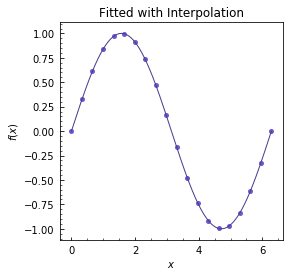

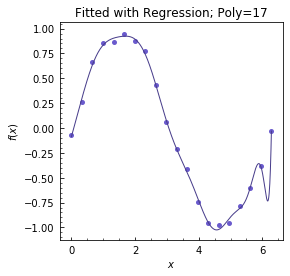

In [5]:
# plot results
plot_line_points(xt, poly_int, xp=xtr, yp=ftr_int, points=True,
                 xlabel=r'$x$', ylabel=r'$f(x)$', figsize=4,
                 plot_title="Fitted with Interpolation")

plot_line_points(xt, poly_fit, xp=xtr, yp=ftr_fit, points=True,
                 xlabel=r'$x$', ylabel=r'$f(x)$',
                 plot_title="Fitted with Regression; Poly=17",figsize=4)

### Effect of decreasing training points (ntr)

The fit for the interpolationg polynomial is actually relatively similar for successively decreasing $ntr$, starting from 20. Even with the small $ntr$=4, the polynomial still qualitatively looks like a sine, but the interpolation does not really work when ntr=3.

The minimum value of training points ($ntr$ = 4) must be sufficient to indicate at least one maximum and one minimum for the polynomial to still look like a sine, and it seems to require at least two points on either side so that the interpolation can "guess" that there is a local maximum or minimum in between those two points.

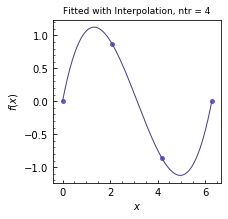

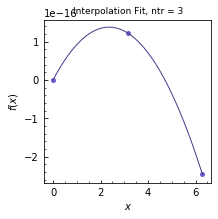

In [6]:
#reset parameters 
xmin, xmax, 0., 2.*np.pi
nt = 1000 # should be different from nt
xt = np.linspace(xmin, xmax, nt) #testing data

ntr = 4
xtr = np.linspace(xmin, xmax, ntr) #training data
ftr_int = np.sin(xtr) #tabulated data 

#Attempt to fit polynomial with interpolation method
poly_int, a_int = poly_approx(xtr, ftr_int, xt, method='interpolation')
plot_line_points(xt, poly_int, xp=xtr, yp=ftr_int, points=True,
                 xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3,
                 plot_title="Fitted with Interpolation, ntr = 4")

ntr = 3
xtr = np.linspace(xmin, xmax, ntr) #training data
ftr_int = np.sin(xtr) #tabulated data 

#Attempt to fit polynomial with interpolation method
poly_int, a_int = poly_approx(xtr, ftr_int, xt, method='interpolation')
plot_line_points(xt, poly_int, xp=xtr, yp=ftr_int, points=True,
                 xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3,
                 plot_title="Interpolation Fit, ntr = 3")

## **Task 1b. (5 points)**

In [7]:
nkt = 1000
kt = np.linspace(k.min(), k.max(), nkt)

The following code fails since the SVD is not able to converge in Least Squares because the specified degree of the polynomial is the exact same size as the size of the tabulated data (1000), meaning all the points would be some kind of local minima/maxima, so it is not possible to fit.

In [8]:
#attempt poly_approx for training: lk, tabulated: lPk, test: kt
poly_int, a_int = poly_approx(lk, lPk, kt, method='regression',
                              poly_order=np.size(kt))
print(a_int, np.size(a_int))

LinAlgError: SVD did not converge in Linear Least Squares

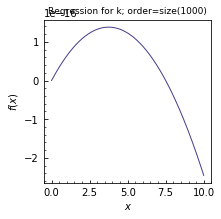

In [11]:
plot_line_points(kt, poly_int, xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3,
                plot_title="Regression for k; order=size(1000)")

## Interpolating for log(k) and log P(k)

Interpolation also fails to correctly approximate the function using $\log_{10} k$ and $\log_{10} P(k)$.

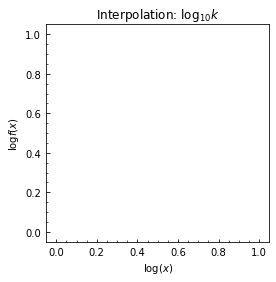

In [12]:
lkt = np.linspace(lk.min(), lk.max(), nkt)
poly_intl, a_intl = poly_approx(lk, lPk, lkt, method='interpolation')
poly_intl
plot_line_points(lkt, poly_intl, xlabel=r'$\log(x)$', ylabel=r'$\log f(x)$', figsize=4,
                 plot_title="Interpolation: $\log_{10}k$")

### Regression method

**Do you get a sensible result? Think about what the routine is doing and try to come up with an explanation for the outcome of this exercise. (7 points)**

The result using the regression method is not sensible because the specified order is too large. When the polynomial order is larger, the algorithm expects to find more minima/maxima but still wants to minimize the overall least squares error (due to the regression method), which results in this oscillating behavior. 



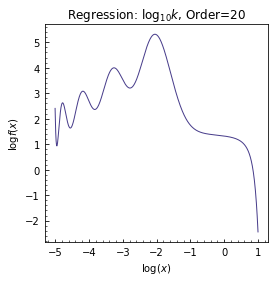

In [13]:
poly_int_reg, a_int_reg = poly_approx(lk, lPk, lkt, method='regression',
                              poly_order=20)
plot_line_points(lkt, poly_int_reg, xlabel=r'$\log(x)$',
                 ylabel=r'$\log f(x)$',
                 figsize=4,
                 plot_title="Regression: $\log_{10}k$, Order=20")

### Regression with smaller poly_order values

I also tried the regression method with progressively smaller poly_order values starting from 19 down to 3. The approximations look relatively similar for poly_orders smaller than 18 and reasonable approximations can be found for order as low as 3 (with 2 it is just a straight line). It makes sense that it works for a small order since the actual function we are trying to approximate does not have many minima/maxima.


Poly_order:  19


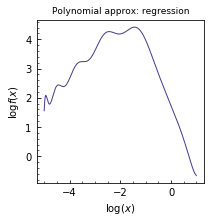

Poly_order:  15


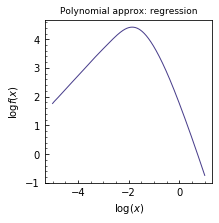

Poly_order:  11


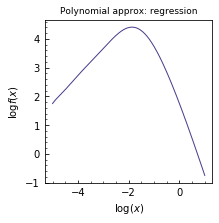

Poly_order:  7


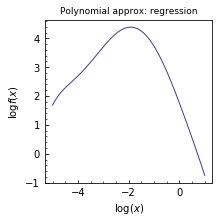

Poly_order:  3


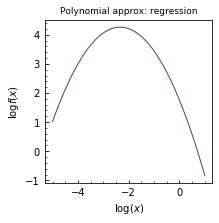

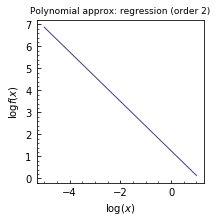

In [16]:

for i in range(19, 1, -4):
    print("Poly_order: ", i)
    poly_int, a_int = poly_approx(lk, lPk, lkt, method='regression',
                                  poly_order=i)
    plot_line_points(lkt, poly_int,
                 xlabel=r'$\log(x)$',
                 plot_title="Polynomial approx: regression",
                 ylabel=r'$\log f(x)$', figsize=3)
poly_int, a_int = poly_approx(lk, lPk, lkt, method='regression',
                                  poly_order=2)
plot_line_points(lkt, poly_int,
                 xlabel=r'$\log(x)$',
                 plot_title="Polynomial approx: regression (order 2)",
                 ylabel=r'$\log f(x)$', figsize=3)

### Task 1c

In [20]:
from scipy.integrate import romberg

#using provided cubic spline function here...
def cubic_spline_coefficients(xi, fi):
    """
    compute coefficients of the interpolating natural cubic spline
    see Appendix in the note for the derivation and details of the algorithm
    
    Parameters: 
        xi, fi: numpy float vectors
                tabulated points and function values
            
    Returns:
        a, b, c, d: numpy float vectors
                cubic spline coefficients 
                dx = x - xi[i]
                fx = a[i] + dx*(b[i] + c[i]*dx + d[i]*dx*dx)

    """
    delx = np.diff(xi); delf = np.diff(fi)
    # form matrices to solve for spline coefficients
    vx = np.zeros_like(xi)
    # form rhs vector using python's array slicing 
    vx[1:-1:] = 3.*(delf[1::]/delx[1::] - delf[:-1:]/delx[:-1:])
    # construct 3 diagonals
    nx = np.size(xi)
    diags = np.zeros((3, nx))
    diags[1,0] = 1.; diags[1,-1] = 1.
    diags[1,1:-1:] = 2. * (delx[1::] + delx[:-1:])
    diags[0,1:] = delx[:]
    diags[2,1:-1] = delx[1:]
    # solve for coefficients c using Thomas algorithm for tri-diagonal matrices
    # see https://www.cfd-online.com/Wiki/Tridiagonal_matrix_algorithm_-_TDMA_(Thomas_algorithm)
    ac, bc, cc, dc = map(np.array, (diags[0,:], diags[1,:], diags[2,:], vx)) # copy arrays
    for k in range(1, nx):
        mk = ac[k] / bc[k-1]
        bc[k] = bc[k] - mk * cc[k-1] 
        dc[k] = dc[k] - mk * dc[k-1]
    
    c = np.zeros_like(bc)
    c[-1] = dc[-1] / bc[-1]

    for k in range(nx-2, -1, -1):
        c[k] = (dc[k]-cc[k]*c[k+1])/bc[k]

    # now get the rest of the coefficients
    b = delf[::]/delx[::] - (c[1::] + 2.*c[:-1:])*delx[::]/3.
    d = (c[1::] - c[:-1:])/(3.*delx[::]) 
    a = fi
    return a, b, c, d

In [21]:
def my_cubic_spline(xt, xi, a, b, c, d):
    """
    piecewise linear approximation of f(x) given input of tabulated values of xi and fi
    note that xi are expected in ascending order
    
    Returns:
        fxt: vector of spline values at test points x 
        delta: vector of first, second, and third derivatives

    """
    n = np.size(xi) - 1
    #print("n size: ",n)
    fxt = np.empty_like(xt)
    delta1 = np.empty_like(xt)
    delta2 = np.empty_like(xt)
    delta3 = np.empty_like(xt)
    #print("delta1 size: ",np.size(delta1))
    #print("first 10 fxt: ",fxt[:10])
    #print("first 10 xt: ",xt[:10])
    for j, x in enumerate(xt):
        for i in range(n):
            if (x >= xi[i]) and (x <= xi[i+1]):
                # reusing computations is always a good idea, but here we also can return dfdx
                dx = x - xi[i]
                fxt[j] = a[i] + dx*(b[i] + c[i]*dx + d[i]*dx*dx)
                #print("made fxt")
                delta1[j] = b[i] + dx*(2*c[i] + 3*d[i]*dx)
                #print("made delta1")
                delta2[j] = 2*c[i] + 6*d[i]*dx
                delta3[j] = 6*d[i]
    delta = np.array([delta1, delta2, delta3])    
    return fxt, delta

def my_int(xi, a, b, c, d, start, end):
    n = np.size(xi) - 1
    areas = np.zeros(n)
    
    for i in range(n):
        if (xi[i] >= start) and (xi[i+1] <= end):
            dx = xi[i+1] - xi[i]
            areas[i] = a[i]*dx + 0.5*b[i]*(dx**2.) + (1./3.)*c[i]*(dx**3.)+ 0.25*d[i]*(dx**4.)
    return np.sum(areas)

### Using  my_cubic_spline to find derivatives of sin(x)

The cubic spline function is able to approximate the $\sin(k)$ function and its derivatives relatively well. However, the third derivative approximation is obviously not as smooth / continuous even though the relative shape is close to the true derivative of $-\cos(k)$. 

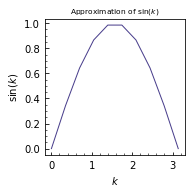

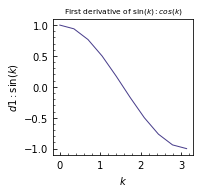

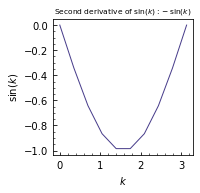

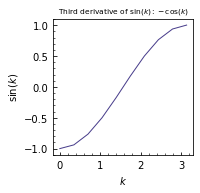

In [35]:
xmin, xmax, ntr = 0., np.pi, 1000
xtr = np.linspace(xmin, xmax, ntr)
sin_ftr = np.sin(xtr)
kt = np.linspace(0, np.pi,10)
a, b, c, d = cubic_spline_coefficients(xtr, sin_ftr)
spline_int, derivs = my_cubic_spline(kt, xtr, a, b, c, d)

plot_line_points(kt, spline_int, 
                 xlabel=r'$k$',
                 ylabel=r'$\sin(k)$',
                 plot_title='Approximation of $\sin(k)$',figsize=2.5)
d1 = derivs[0]
d2 = derivs[1]
d3 = derivs[2]
plot_line_points(kt, d1, 
                 xlabel=r'$k$',
                 ylabel=r'$d1: \sin(k)$',
                 plot_title='First derivative of $\sin(k): cos(k)$',figsize=2.5)

plot_line_points(kt, d2, 
                 xlabel=r'$k$',
                 ylabel=r'$\sin(k)$',
                 plot_title='Second derivative of $\sin(k): -\sin(k)$',figsize=2.5)

plot_line_points(kt, d3, 
                 xlabel=r'$k$',
                 ylabel=r'$\sin(k)$',
                 plot_title='Third derivative of $\sin(k): -\cos(k)$',figsize=2.5)

### Testing accuracy of my_int function on sin(x)

The approximated integral of $\sin(x)$ from 0 to $\pi/2$ is about 1, and the approximated integral of integral of $\sin(x)$ from 0 to $\pi/2$ is about 2, so the <tt>my_int</tt> function seems to be working correctly.

In [36]:
#lkt = np.linspace(lk.min(), lk.max(), nkt)
#a, b, c, d = cubic_spline_coefficients(lk, lPk)
#spline_int, derivs = my_cubic_spline(lkt, lk, a, b, c, d)
            
#Testing parameters
nkt = 1000
xmin, xmax, ntr = 0., np.pi, 1000

#set up xi (tabulated values)
xtr = np.linspace(xmin, xmax, 50)

# set up fi (tabulated function values for log10(sin(x)))
sin_ftr = np.sin(xtr)

#sample points from l_x
kt = np.linspace(xtr.min(), xtr.max(), nkt)

#Test integral function
a, b, c, d = cubic_spline_coefficients(xtr, sin_ftr)
print(my_int(xtr, a, b, c, d, 0, np.pi/2)) #integral should equal 2
print(my_int(xtr, a, b, c, d, 0, np.pi)) #integral should equal 1

0.9679483996788216
1.9999999264865291


## Task 1d

### logarithmic slope of P(k)

The plot of the derivative looks similar to the plot in Figure 4 of the paper, as there is more fluctuation in the derivative as lk approaches 0 but the derivative is otherwise smooth. Some of the differences can be caused by true error in approximation, but they are also likely caused by roundoff error, because when we are computing the derivative for values very close to each other, the computation is limited by machine precision.

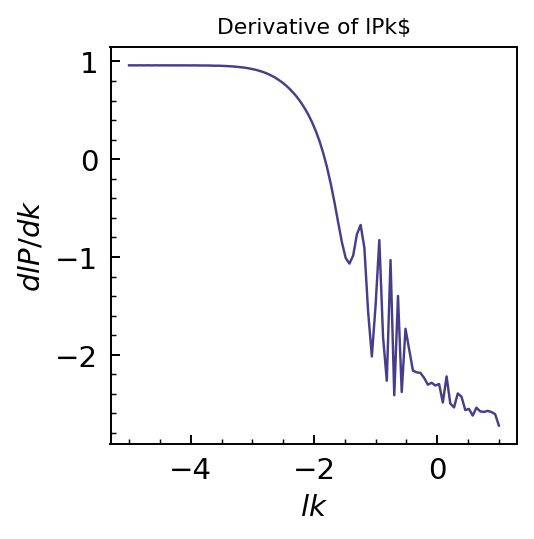

In [84]:
#test interpolation with UnivariateSpline
from scipy.interpolate import UnivariateSpline
#compute logarithmic slope of P(k)
lkt = np.linspace(lk.min(), lk.max(), 100)
a, b, c, d = cubic_spline_coefficients(lk, lPk)
spline_int, derivs = my_cubic_spline(lkt, lk, a, b, c, d)

dlP_dk = derivs[0] #first derivative 
plot_line_points(lkt, dlP_dk, xlabel=r'$lk$', ylabel=r'$dlP / dk$',plot_title='Derivative of lPk$',figsize=3)


## Task 1e

When s=0, the spline will interpolate through all data points. When <tt>s>0</tt>, fewer knots than the number of data points are also allowed, which explains why the derivative looks more uniform/smoother for larger values of <tt>s</tt> .

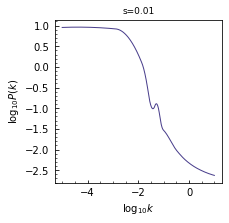

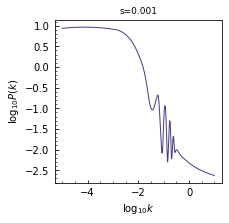

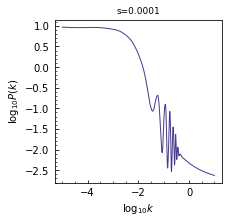

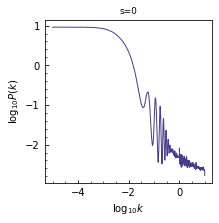

In [39]:
# example of use of derivative method of UnivariateSpline 
from scipy.interpolate import UnivariateSpline
spl = UnivariateSpline(lk, lPk, s=0.01)
dspl = spl.derivative()

plot_line_points(lkt, dspl(lkt), xlabel=r'$\log_{10} k$',
                 ylabel=r'$\log_{10}P(k)$', 
                 plot_title='s=0.01',
                 figsize=3)

spl = UnivariateSpline(lk, lPk, s=0.001)
dspl = spl.derivative()

plot_line_points(lkt, dspl(lkt), xlabel=r'$\log_{10} k$',
                 ylabel=r'$\log_{10}P(k)$', 
                 plot_title='s=0.001',
                 figsize=3)

spl = UnivariateSpline(lk, lPk, s=0.0001)
dspl = spl.derivative()

plot_line_points(lkt, dspl(lkt), xlabel=r'$\log_{10} k$',
                 ylabel=r'$\log_{10}P(k)$', 
                 plot_title='s=0.0001',
                 figsize=3)

spl = UnivariateSpline(lk, lPk, s=0)
dspl = spl.derivative()

plot_line_points(lkt, dspl(lkt), xlabel=r'$\log_{10} k$',
                 ylabel=r'$\log_{10}P(k)$', 
                 plot_title='s=0',
                 figsize=3)

## Task 1f. (5 points)

The interpolated spline for $y=\sin(x)$ on the interval $[0,\pi/2]$ computes values of $x$ for $y=1$, $y=0$, $y=0.5$ that are close to the actual output of <tt>np.arcsin</tt> for these values of $y$. 

In [85]:
def interp_spline(fx, a, b, y_vec):
    """
    Parameters: 
        fx: function
        a, b: [min, max] of x range of fx
        y_vec: y values to be interpolated
    Returns:
        x_vec: vector of guessed x values
    """
    nkt = 100
    xtr = np.linspace(a, b, nkt) #training x values
    y = fx(xtr) #y vectors
    spl = UnivariateSpline(y, xtr, s=0) #interpolating spline
    return spl(y_vec)

y_test = np.array([1,0,0.5])
print("Computing x with interpolating spline: \n",
      interp_spline(np.sin, 0, np.pi/2.,y_test))
print("True arcsin(x) values: \n",
      np.arcsin(y_test))

Computing x with interpolating spline: 
 [1.57079633e+00 5.37918039e-20 5.23598776e-01]
True arcsin(x) values: 
 [1.57079633 0.         0.52359878]


## Exercise 2 (30 points)

In [41]:
from codes.cosmology import d_L_romberg
from scipy.interpolate import RectBivariateSpline
from codes.plot_utils import plot_color_map

#General parameters
clight = 2.99792458e5 # c in km/s
z, H0 = 2.0, 70.
Om0min, Om0max, OmLmin, OmLmax = 0., 1.,0.,1.
ntest = 30
ntr = 10
from codes.cosmology import d_L_vectorized
def lum_grid(z, H0, Om0_vec, OmL_vec, atol=2.e-15, rtol=2.e-15):
    """
    helper function returns a grid of dL (scaled by H0/c)
    with n x n dimensions
    where n = the length of the Om0 and OmL vectors
    """
    n = np.size(Om0_vec)
    grid = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            grid[i][j] = (H0/clight) * d_L_vectorized(z, H0, Om0_vec[i], OmL_vec[j], atol=atol, rtol=rtol)
            #grid[i][j] = lum_scale(z, H0, Om0_vec[i],OmL_vec[j])
    return grid

def chebyshev_nodes1(a, b, N):
    return a + 0.5*(b-a)*(1. + np.cos((2.*np.arange(N+1)+1)*np.pi/(2.*(N+1))))

def chebyshev_nodes2(a, b, N):
    return a + 0.5*(b-a)*(1. + np.cos(np.arange(N+1)*np.pi/N))

def spline2d(z, Om0_min, Om0_max, OmL_min, OmL_max, n_tr, n_test, method=None):
    """
    construct a 2d spline approximation with fractional accuracy < 10e-4
    returns a grid of values approximated by the input method
    """
    #TRAINING GRID
    ntr = n_tr #number of training points
    ntest = n_test #number of testing points
    
    if method=="even":
        Om0tr = np.linspace(Om0_min, Om0_max, ntr)
        OmLtr = np.linspace(OmL_min, OmL_max, ntr)
    elif method=="chebyshev1":
        Om0tr = chebyshev_nodes1(Om0_min, Om0_max, ntr-1)[::-1]
        OmLtr = chebyshev_nodes1(OmL_min, OmL_max, ntr-1)[::-1]
    elif method=="chebyshev2":
        Om0tr = chebyshev_nodes2(Om0_min, Om0_max, ntr-1)[::-1]
        OmLtr = chebyshev_nodes2(OmL_min, OmL_max, ntr-1)[::-1]
    else:
        return "Invalid method"
    dLtr = lum_grid(z, H0, Om0tr, OmLtr)
    #print(dLtr[:,0], dLtr[:,1])
    
    #FITTING SPLINE
    spl2d = RectBivariateSpline(Om0tr, OmLtr, dLtr, s=0, kx=3, ky=3) #fit spline to data
    
    Om0 = np.linspace(Om0min, Om0max, ntest)
    OmL = np.linspace(OmLmin, OmLmax, ntest)
    dLspline = spl2d(Om0, OmL) #Apply approximation to whole testing grid
    
    return dLspline

def frac_error(approx, z_val, Om0_min, Om0_max, OmL_min, OmL_max, n_test,
               plot=False):
    """
    helper function to compute fractional error given a grid of approximated values
    returns the maximum fractional error associated with the approximation
    """
    #COMPUTE EXACT GRID
    Om0 = np.linspace(Om0_min, Om0_max, n_test)
    OmL = np.linspace(OmL_min, OmL_max, n_test)
    dLgrid = lum_grid(z, H0, Om0, OmL)
    
    ferr = np.log10(np.maximum(np.abs(1.0-approx/dLgrid), 2.e-16))
    
    if plot==True:
        plot_line_points(Om0, ferr, xlabel=r'$\Omega_{\rm m0}$', 
                 ylabel=r'$\log_{10}\vert\rm frac.\ interpolation\ error\vert$', 
                 plot_title='fractional error', 
                 figsize=3.0)
        plot_color_map(Om0, OmL, ferr, xlim=[Om0_min,Om0_max], ylim=[OmL_min,OmL_max], 
                   xlabel = '$\Omega_0$', ylabel = '$\Omega_\Lambda$',
               cmap='winter', colorbar=True, 
                   plot_title='fractional error', 
                   figsize=3.0)
    return ferr.max()
  

## Evenly spaced training points

When using evenly spaced training points, the training grid must be at least around 55 x 55 (in comparison with a test grid of size 100 x 100) in order to achieve the target fractional accuracy of $10^{-4}$.

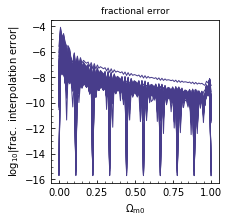

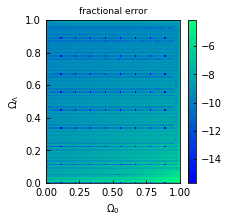

-4.067825851101769

In [42]:
ntest = 100
ntr = 55
dLspline = spline2d(z, Om0min, Om0max, OmLmin, OmLmax, ntr, ntest, method="even") 
frac_error(dLspline, z, Om0min, Om0max, OmLmin, OmLmax,ntest, plot=True)

## Chebyshev nodes of the 1st kind

When using Chebyshev nodes of the 1st kind, the 2D spline approximation in general performs better than the evenly spaced nodes for a smaller number of training points, with most of the fractional error below the target accuracy of 10e-4 when the training grid is larger than 30 x 30.

However, because the minimum and maximum of the generated Chebyshev nodes of the 1st kind are slightly larger and smaller, respectively, than the input $\Omega_{m0}$ and $\Omega_{\Lambda}$ values, there are very large errors at extreme values of $\Omega_{m0}$ and $\Omega_{\Lambda}$. (ex. in the fractional error plots below, the large error represented by the line across is the fractional error corresponding to $\Omega_{\Lambda}$ being close to 0 or 1 over the range of all $\Omega_{m0}$.

Testing points:  100 Training points:  10


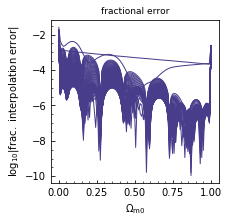

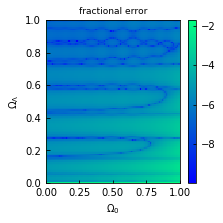

Testing points:  100 Training points:  30


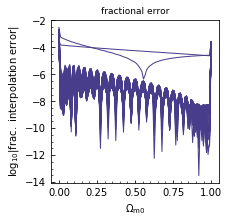

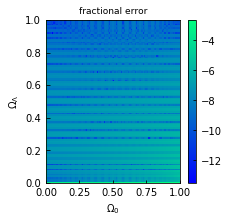

Testing points:  100 Training points:  50


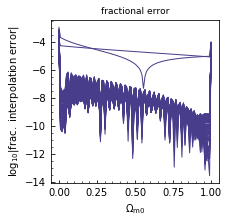

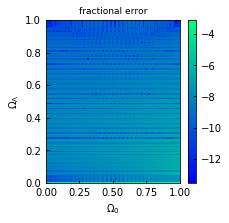

In [43]:
ntest = 100
for i in range(10, 70, 20):
    print("Testing points: ",ntest, "Training points: ", i)
    dLspline = spline2d(z, Om0min, Om0max, OmLmin, OmLmax, i, ntest, method="chebyshev1") 
    frac_error(dLspline, z, Om0min, Om0max, OmLmin, OmLmax,
           ntest, plot=True)

## Chebyshev nodes of the 2nd kind

When using Chebyshev nodes of the 2nd kind, we can achieve the target fractional accuracy of 10e-4 with about 14 training points. In addition, the color map indicates that while increasing training points from 20 to 30 also results in low fractional errors, there is not that much of a difference (i.e. there is not that much marginal gain from increasing the number of training points once the target accuracy has been passed).

Testing points:  100 Training points:  10


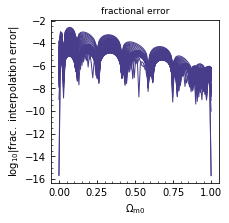

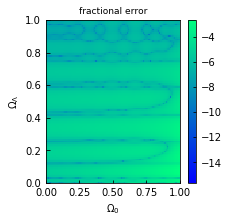

Testing points:  100 Training points:  20


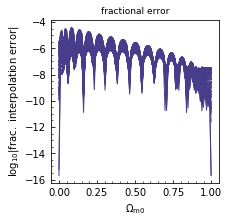

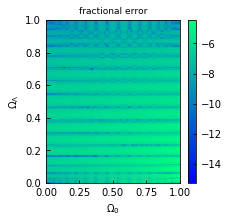

Testing points:  100 Training points:  30


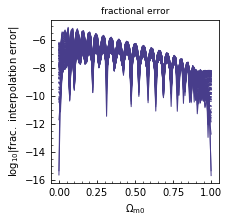

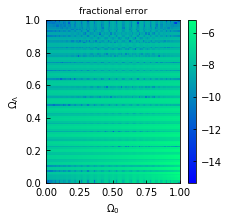

-5.126213606558683

In [44]:
ntest = 100
ntr = 10
print("Testing points: ",ntest, "Training points: ", ntr)
dLspline = spline2d(z, Om0min, Om0max, OmLmin, OmLmax, ntr, ntest, method="chebyshev2") 
frac_error(dLspline, z, Om0min, Om0max, OmLmin, OmLmax,ntest, plot=True)

ntr = 20
print("Testing points: ",ntest, "Training points: ", ntr)
dLspline = spline2d(z, Om0min, Om0max, OmLmin, OmLmax, ntr, ntest, method="chebyshev2") 
frac_error(dLspline, z, Om0min, Om0max, OmLmin, OmLmax,ntest, plot=True)


ntr = 30
print("Testing points: ",ntest, "Training points: ", ntr)
dLspline = spline2d(z, Om0min, Om0max, OmLmin, OmLmax, ntr, ntest, method="chebyshev2") 
frac_error(dLspline, z, Om0min, Om0max, OmLmin, OmLmax,ntest, plot=True)

**Task 2b (15 points).** Although there is no convenient Scipy routine for polynomial interpolation in 2d, we can use the same approach as was used in Task 1a to construct interpolating polynomial in 2d, as is done in the following routine (a modified version of the routine provided <a href="https://stackoverflow.com/questions/33964913/equivalent-of-polyfit-for-a-2d-polynomial-in-python">here</a>). 

Write a routine that constructs 2D *polynomial* approximation of $\tilde{d}_L(z,\Omega_{\rm m0}, \Omega_\Lambda)$ for a given input single value of redshift $z$ and for ranges of the $\Omega_{\rm m0}$ and $\Omega_\Lambda)$ parameters of $\Omega_{\rm m0}\in [0.1]$ and $\Omega_\Lambda\in[0.,1]$. Just like for the spline in 2a, experiment with different training point spacings (for example, evenly spaced vs Chebyshev nodes) and try to find the spacing that reaches the target fractional accuracy of $10^{-4}$ with the smallest size of the training set. 

State your conclusions about the optimal method for approximating $\tilde{d}_L(z,\Omega_{\rm m0}, \Omega_\Lambda)$ supporting it with tests of fractional accuracy and plots, as needed. Each of the groups will make a brief presentation of their results in class Friday of next week.

In [45]:
def polyfit2d(xtr, ytr, ftr, kx=3, ky=3, order=None):
    '''
    Two dimensional polynomial fitting by least squares.
    Fits the functional form f(x,y) = z.

    Notes
    -----
    Resulting fit can be plotted with:
    np.polynomial.polynomial.polygrid2d(x, y, soln.reshape((kx+1, ky+1)))

    Parameters:
    ----------
    xtr, ytr: array-like, 1d
        xtr and ytr coordinates.
    ftr: 2d numpy array
        f(xgtr, ygtr) values evaluated on meshgrid of xtr and ytr vectors to fit by polynomial
    kx, ky: int, default is 3
        Polynomial order in x and y, respectively.
    order: int or None, default is None
        If None, all coefficients up to maxiumum kx, ky, ie. up to and including x^kx*y^ky, are considered.
        If int, coefficients up to a maximum of kx+ky <= order are considered.

    Returns:
    -------
    Return paramters from np.linalg.lstsq.

    soln: np.ndarray
        Array of polynomial coefficients.
    residuals: np.ndarray
    rank: int
    s: np.ndarray

    '''

    # grid coords
    x, y = np.meshgrid(xtr, ytr)
    # coefficient array, up to x^kx, y^ky
    coeffs = np.ones((kx+1, ky+1))

    # solve array
    V = np.zeros((coeffs.size, x.size))

    # construct Vandermonde matrix: for each coefficient produce array x^i, y^j
    for index, (j, i) in enumerate(np.ndindex(coeffs.shape)):
        # do not include powers greater than order
        if order is not None and i + j > order:
            arr = np.zeros_like(x)
        else:
            arr = coeffs[i, j] * x**i * y**j
        V[index] = arr.flatten()
        
    # do leastsq fitting and return leastsq result
    return np.linalg.lstsq(V.T, np.ravel(ftr), rcond=None)[0]

In [50]:
def poly2d(z, Om0_min, Om0_max, OmL_min, OmL_max, n_tr, n_test, method):
    """
    construct a 2d spline approximation with fractional accuracy < 10e-4
    returns a grid of values approximated by the input method
    """
    #TRAINING GRID
    ntr = n_tr #number of training points
    ntest = n_test #number of testing points
    
    if method=="even":
        Om0tr = np.linspace(Om0_min, Om0_max, ntr)
        OmLtr = np.linspace(OmL_min, OmL_max, ntr)
    elif method=="chebyshev1":
        print("c1")
        Om0tr = chebyshev_nodes1(Om0_min, Om0_max, ntr-1)[::-1]
        OmLtr = chebyshev_nodes1(OmL_min, OmL_max, ntr-1)[::-1]
    elif method=="chebyshev2":
        Om0tr = chebyshev_nodes2(Om0_min, Om0_max, ntr-1)[::-1]
        OmLtr = chebyshev_nodes2(OmL_min, OmL_max, ntr-1)[::-1]
    else:
        return "Invalid method"
    dLtr = lum_grid(z, H0, Om0tr, OmLtr)
    
    #FITTING POLYNOMIAL
    px, py = 14,14
    dLtr_poly = lum_grid(z, H0, Om0tr, OmLtr)
    #print(np.shape(OmLtr))
    a = polyfit2d(Om0tr, OmLtr, dLtr_poly, kx=px, ky=py, order=None) #fit spline to data
    #print(np.shape(a))
    
    Om0 = np.linspace(Om0_min, Om0_max, ntest)
    OmL = np.linspace(OmL_min, OmL_max, ntest)
    Om0_grid, OmL_grid = np.meshgrid(Om0, Om0, sparse=False, indexing='ij')
    print(np.shape(Om0_grid))
    
    # compute polynomial values on the grid of test points
    fitted = np.polynomial.polynomial.polyval2d(Om0_grid, OmL_grid, a.reshape((px+1,py+1)))
    
    return fitted

def frac_error(approx, z_val, Om0_min, Om0_max, OmL_min, OmL_max, n_test, plot=False):
    """
    helper function to compute fractional error given a grid of approximated values
    returns the maximum fractional error associated with the approximation
    """
    #COMPUTE EXACT GRID
    Om0 = np.linspace(Om0min, Om0max, ntest)
    OmL = np.linspace(OmLmin, OmLmax, ntest)
    dLgrid = lum_grid(z, H0, Om0, OmL)
    
    #print(np.shape(approx), np.shape(dLgrid))
    ferr = np.log10(np.maximum(np.abs(1.0-approx/dLgrid), 2.e-16))
    
    if plot==True:
        plot_color_map(Om0, OmL, ferr, xlim=[Om0_min,Om0_max], ylim=[OmL_min,OmL_max], 
                   xlabel = '$\Omega_0$', ylabel = '$\Omega_\Lambda$',
               cmap='winter', colorbar=True, 
                   plot_title='fractional error', 
                   figsize=3.0)
    print(ferr.max())
    return ferr.max()

### Evenly spaced nodes

Like in Task 2a, using evenly spaced nodes also results in using a higher number of training points (>30 in the case of polynomial order 14, but this can vary with different orders too) in order to reach the target fractional accuracy. In addition, adding too many training points can result in some instability in fractional error patterns which is reflected in the color maps as well.

Testing points:  100 Training points:  10
(100, 100)


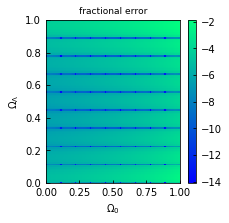

-1.8205830380494332
Testing points:  100 Training points:  20
(100, 100)


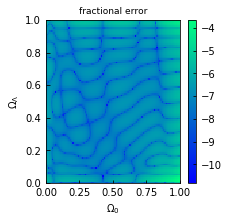

-3.5438150400805717
Testing points:  100 Training points:  30
(100, 100)


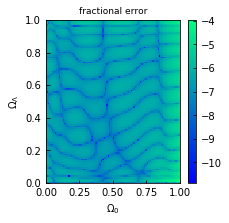

-3.833126355642026


In [52]:
ntest = 100
for i in range(10, 40, 10):
    print("Testing points: ",ntest, "Training points: ", i)
    dLpoly = poly2d(z, Om0min, Om0max, OmLmin, OmLmax, i, ntest, method="even") 
    frac_error(dLpoly, z, Om0min, Om0max, OmLmin, OmLmax,ntest, plot=True)

### Chebyshev nodes of the 1st kind

The Chebyshev nodes of the 1st kind definitely perform better than the evenly spaced nodes as the target fractional accuracy is reached with just 15 points. The overall accuracy does improve with some number of additional training points, but probably not significantly enough to account for computation time if too many training points are used, and the maximum fractional error also does not decrease significantly with additional training points, so it is probably sufficient to use a smaller number.  

Testing points:  100 Training points:  10
c1
(100, 100)


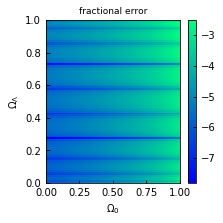

-2.4196942317208414
Testing points:  100 Training points:  15
c1
(100, 100)


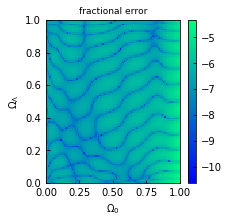

-4.178978316942971
Testing points:  100 Training points:  20
c1
(100, 100)


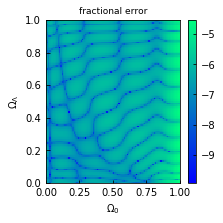

-4.357879554799191
Testing points:  100 Training points:  25
c1
(100, 100)


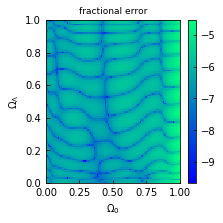

-4.3454504200921225


In [53]:
ntest = 100
for i in range(10, 30, 5):
    print("Testing points: ",ntest, "Training points: ", i)
    dLpoly = poly2d(z, Om0min, Om0max, OmLmin, OmLmax, i, ntest, method="chebyshev1") 
    frac_error(dLpoly, z, Om0min, Om0max, OmLmin, OmLmax,ntest, plot=True)

## Chebyshev nodes of the 2nd kind

The Chebyshev nodes of the 2nd kind has similar performance as the Chebyshev nodes of the 1st kind, as the target fractional accuracy is reached with just 15 points. Similarly, beyond a certain number of training points (around 25-30), the  overall accuracy and maximum fractional error does not improve much relative to the additional computation time required.

Testing points:  100 Training points:  10
(100, 100)


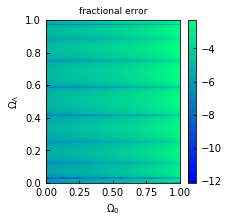

-2.226308403857371
Testing points:  100 Training points:  15
(100, 100)


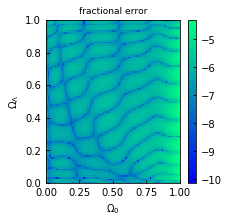

-4.216329194050361
Testing points:  100 Training points:  20
(100, 100)


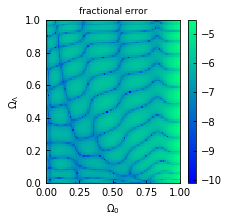

-4.379934971735026
Testing points:  100 Training points:  25
(100, 100)


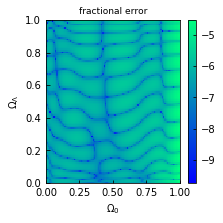

-4.367903937945056


In [54]:
ntest = 100
for i in range(10, 30, 5):
    print("Testing points: ",ntest, "Training points: ", i)
    dLpoly = poly2d(z, Om0min, Om0max, OmLmin, OmLmax, i, ntest, method="chebyshev2") 
    frac_error(dLpoly, z, Om0min, Om0max, OmLmin, OmLmax,ntest, plot=True)


### Exercise 3 (extra-credit, 10 points): implementing spline interpolation as a Python class

Implementing a spline routine as a python class. In this exercise you would learn (or practice) object-oriented programming in python, which is particularly suited for this task. To learn how classes are defined and used in Python, see <a href="https://www.python-course.eu/python3_object_oriented_programming.php">this tutorial</a> or ask instructor or TAs.  

**Task.** Using the routines for calculation of spline coefficient vectors <tt>a, b, c, d</tt> and then the calculation of the actual spline values for an arbitrary input vector $x$  provided in this notebook above (routines <tt>cubic_spline_coefficients</tt> and <tt>cubic_spline</tt>) implement a class for spline interpolation that can be initialized and then used for an arbitrary input vector, similar to the way SciPy routines <a href="https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.interpolate.interp1d.html"><tt>interp1d</tt></a> and <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html"><tt>UnivariateSpline</tt></a> are used.  